<a href="https://colab.research.google.com/github/PedroDiasACN/lia1_2024_2/blob/main/Entregas%20-%20Pedro%20Dias%20Ananias%20Costa%20Neto/Atividade%204%20-%20TensorFlow%20com%20dataset%20Fashion-MNIST/Modelo_com_TensorFlow_Fashion_MNIST_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Ponta a Ponta - Construindo um Modelo com Tensorflow -  Fashion-MNIST**

**Problema:** construir um modelo de Inteligência Artificial capaz de classificar imagens, considerando 10 categorias, sendo: *'T-shirt_top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot'*.

**Fonte de dados**

O conjunto de dados Fashion-MNIST é uma coleção de imagens comumente usadas para treinar algoritmos de aprendizado de máquina e visão computacional. É um dos conjuntos de dados mais amplamente utilizados para pesquisa de aprendizado de máquina.

In [2]:
# Montando o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importando o necessário
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**Carregando os dados de Treino e Teste**

In [4]:
# Carrega o dataset Fashion-MNIST - Já está no Keras!
# Todos os DS no Keras -> https://keras.io/api/datasets/
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.fashion_mnist.load_data()
# Definindo os parâmetros corretos para as imagens
assert imagens_treino.shape == (60000, 28, 28)
assert imagens_teste.shape == (10000, 28, 28)
assert labels_treino.shape == (60000,)
assert labels_teste.shape == (10000,)
imagens_treino = imagens_treino.reshape(-1, 28, 28, 1)
imagens_teste = imagens_teste.reshape(-1, 28, 28, 1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# Classes das imagens
nomes_classes = ['T-shirt_top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [6]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [7]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
# Corrigi mudando de labels[i][0] para labes[i]
        plt.xlabel(nomes_classes[labels[i]])
    plt.show()

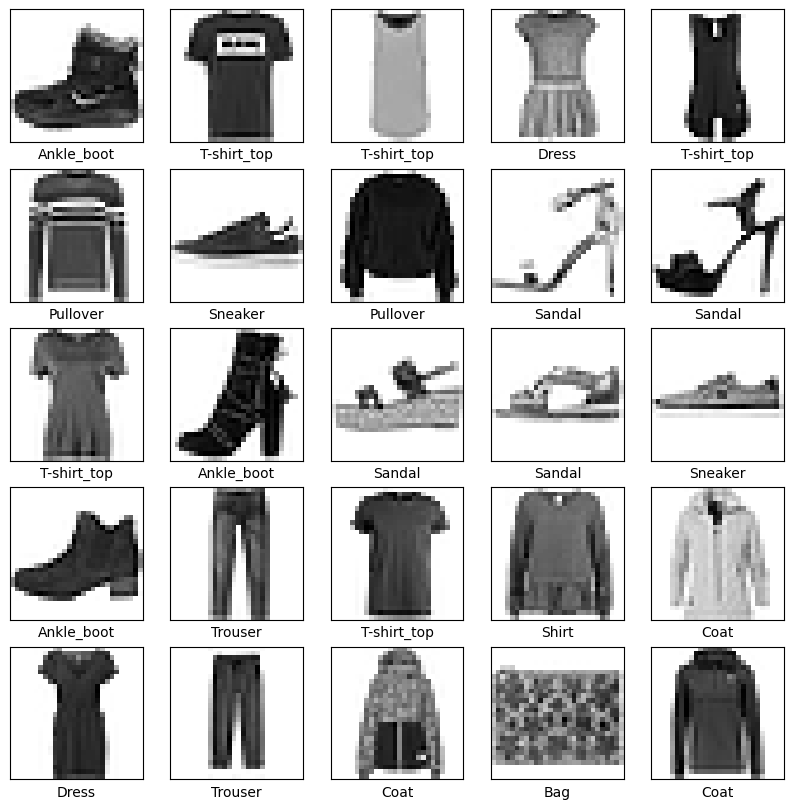

In [8]:
# Executa a função para visualizar as imagens
visualiza_imagens(imagens_treino, labels_treino)

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [9]:
# Arquitetura do Modelo -> Feature Learning

# Cria o objeto de sequência de camadas - do Keras
modelo_lia = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adicionando Dropout
modelo_lia.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [11]:
# Compilação do modelo
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

In [12]:
# Pré-processando ainda mais a imagem, de modo a buscar melhores resultados
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,  # Deslocamento horizontal
                                   height_shift_range=0.2)  # Deslocamento vertical)

In [13]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow(imagens_treino,
                                  labels_treino,
                                  batch_size = 32)

**Treinamento**

In [14]:
# Verificando o formados das imagens e labels de treinamento
print(imagens_treino.shape)
print(labels_treino.shape)

(60000, 28, 28, 1)
(60000,)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6956 - loss: 0.8320 - val_accuracy: 0.8269 - val_loss: 0.4664
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8376 - loss: 0.4473 - val_accuracy: 0.8594 - val_loss: 0.3798
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8639 - loss: 0.3732 - val_accuracy: 0.8676 - val_loss: 0.3511
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8756 - loss: 0.3355 - val_accuracy: 0.8761 - val_loss: 0.3365
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8893 - loss: 0.3011 - val_accuracy: 0.8861 - val_loss: 0.3208
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8934 - loss: 0.2840 - val_accuracy: 0.8805 - val_loss: 0.3160
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9043 - loss: 0.2578 - val_accuracy: 0.8887 - val_loss: 0.3051
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9090 - loss:

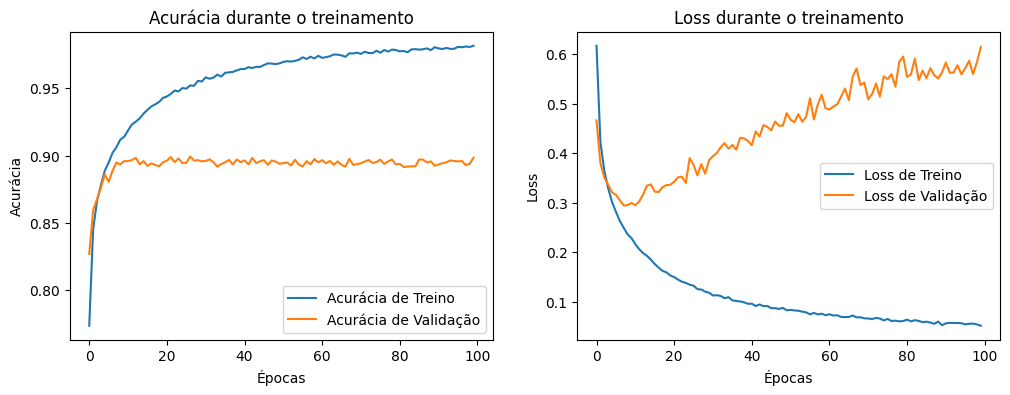

CPU times: user 9min 36s, sys: 34.3 s, total: 10min 10s
Wall time: 11min 51s


In [15]:
%%time

import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os

caminho_modelo_salvo = '/content/drive/MyDrive/Colab Notebooks/Tarefas LIA/Aula 12 - Modelo Cifar10/Atividade_Fashion-MNIST/Modelos_criados/meu_modelo_100.keras'

# Se o modelo já existir, simplesmente carrega ele
if os.path.exists(caminho_modelo_salvo):
    # Carregar o modelo salvo
    modelo_lia = load_model(caminho_modelo_salvo)
    print("Modelo carregado com sucesso!")
else:
    # Treinando o modelo se ele não existir
    history = modelo_lia.fit(imagens_treino,
                             labels_treino,
                             batch_size=32,
                             epochs=100,
                             validation_data=(imagens_teste, labels_teste))

    # Salvando o modelo no Google Drive
    modelo_lia.save(caminho_modelo_salvo)
    print(f"Modelo treinado e salvo em: {caminho_modelo_salvo}")

    # Plotando os gráficos de accuracy e loss
    # Acurácia
    plt.figure(figsize=(12, 4))

    # Gráfico de Acurácia
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Acurácia de Treino')
    plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
    plt.title('Acurácia durante o treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    # Gráfico de Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss de Treino')
    plt.plot(history.history['val_loss'], label='Loss de Validação')
    plt.title('Loss durante o treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Previsão - Testar o modelo (Deploy)**

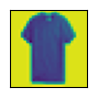

In [16]:
# Carrega uma nova imagem e converte ela para monocromática
nova_imagem = Image.open("/content/drive/MyDrive/Colab Notebooks/Tarefas LIA/Aula 12 - Modelo Cifar10/Atividade_Fashion-MNIST/Teste/Shirt.webp").convert("L")

# Redimensiona para 28x28 pixels
nova_imagem = nova_imagem.resize((28, 28))

# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()


In [17]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [18]:
# Expande a dimensão do array para que ele tenha o formato (1, 28, 28, 1)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)
# Reshape para que ele tenha o exato formato das imagens usadas no treinamento
nova_imagem_array = nova_imagem_array.reshape(-1, 28, 28, 1)

In [19]:
# Fazendo a previsão!
previsoes = modelo_lia.predict(nova_imagem_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


In [20]:
# Transforma o valor em uma porcentagem e mostra ele relacionado ao index referente
previsoes = previsoes*100
for i, valor_previsao in enumerate(previsoes[0]):
    print(f"{nomes_classes[i]}: {valor_previsao:.8f}","%")

T-shirt_top: 5.63662910 %
Trouser: 15.02322960 %
Pullover: 28.62131500 %
Dress: 0.25032455 %
Coat: 0.02919366 %
Sandal: 0.00000021 %
Shirt: 50.16233444 %
Sneaker: 0.00000000 %
Bag: 0.27696669 %
Ankle_boot: 0.00000868 %


In [21]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [22]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: Shirt


Fim! 🔥